<a href="https://colab.research.google.com/github/VrindaK23/EComm-RecSys/blob/main/Project_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Overview**
This dataset contains fashion product details, which will be used to build a recommendation system.
We will explore its structure, check for missing values, duplicates, and analyze numerical and categorical features.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Phase 1: Data Preparation & Exploration**

## **Step 1: Load the Dataset**

We begin by loading our dataset from a CSV file using Pandas.  
This dataset contains fashion product details, which we will analyze  
before implementing a recommendation system.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets📊/fashion_products.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows
display(df.head())

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


## **Step 2: Check Basic Information**

Before proceeding, let's examine the dataset's structure:  
- Column names  
- Data types  
- Number of missing values  
- Number of duplicate rows

In [ ]:
# Display column names and data types
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB

Missing Values in Each Column:
User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

Number of Duplicate Rows: 0


## **Step 3: Basic Statistics**

We'll now generate summary statistics to understand numerical columns  
(such as prices, ratings, etc.) and get insights into data distribution.

In [ ]:
# Summary statistics of numerical columns
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


## **Step 4: Checking for Inconsistent Data**

We'll now check for incorrect values, such as:  
- Negative prices (if applicable)  
- Unusual ratings (e.g., greater than 5 if the scale is 1-5)  
- Incorrect category names (e.g., typos)


In [ ]:
# Check for negative or zero prices (if applicable)
if "price" in df.columns:
    print("Negative or Zero Price Count:", (df["price"] <= 0).sum())

    # Remove invalid price values if any
    df = df[df["price"] > 0]

# Check for ratings out of expected range (1-5)
if "rating" in df.columns:
    print("Ratings out of Range:", df[(df["rating"] < 1) | (df["rating"] > 5)].shape[0])

    # Filter out incorrect ratings (assuming scale of 1-5)
    df = df[(df["rating"] >= 1) & (df["rating"] <= 5)]
    print(df)
    print(len(df))

## Step 7: **Standardizing Column Names**

Column names should be consistent to avoid errors in processing.  
We'll convert them to lowercase and replace spaces with underscores.

In [ ]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Display updated column names
print("Updated Column Names:", df.columns)

Updated Column Names: Index(['user_id', 'product_id', 'product_name', 'brand', 'category', 'price',
       'rating', 'color', 'size'],
      dtype='object')


# **Exploratory Data Analysis (EDA)**

## **Step 1: Dataset Overview**

Before diving into specific analyses, we will check:  
- The total number of records  
- Unique values in key columns (e.g., products, categories, brands)  
- Basic summary statistics

In [ ]:
# Check total records
print(f"Total records: {df.shape[0]}")

# Check number of unique products, categories, and brands (if applicable)
if "product_id" in df.columns:
    print(f"Unique products: {df['product_id'].nunique()}")

if "category" in df.columns:
    print(f"Unique categories: {df['category'].nunique()}")
    print("Categories:", df["category"].unique())

if "brand" in df.columns:
    print(f"Unique brands: {df['brand'].nunique()}")
    print("Brands:", df["brand"].unique())

# Display summary statistics
df.describe()

Total records: 1000
Unique products: 1000
Unique categories: 3
Categories: ["Men's Fashion" "Women's Fashion" "Kids' Fashion"]
Unique brands: 5
Brands: ['Adidas' 'H&M' 'Zara' 'Gucci' 'Nike']


,user_id,product_id,price,rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


## **Step 2: Price Distribution**

Understanding the price distribution helps identify:  
- The average price range  
- The presence of outliers (extremely high or low prices)  
- Whether prices follow a normal distribution  
We will visualize this using histograms and boxplots.

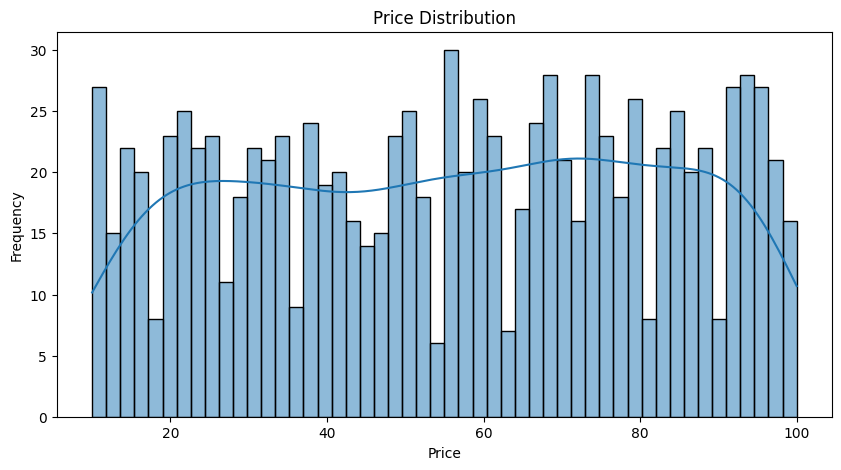

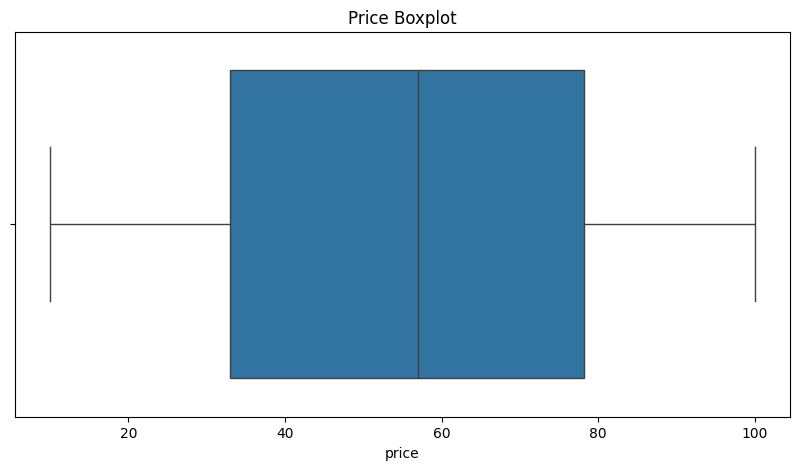

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if price column exists
if "price" in df.columns:
    plt.figure(figsize=(10,5))

    # Histogram
    sns.histplot(df["price"], bins=50, kde=True)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df["price"])
    plt.title("Price Boxplot")
    plt.show()

## **Step 3: Rating Distribution**

Ratings indicate user preferences and satisfaction.  
We will check the distribution to identify:  
- The most common ratings  
- Any missing or unusual values  
- Whether users tend to give higher or lower ratings

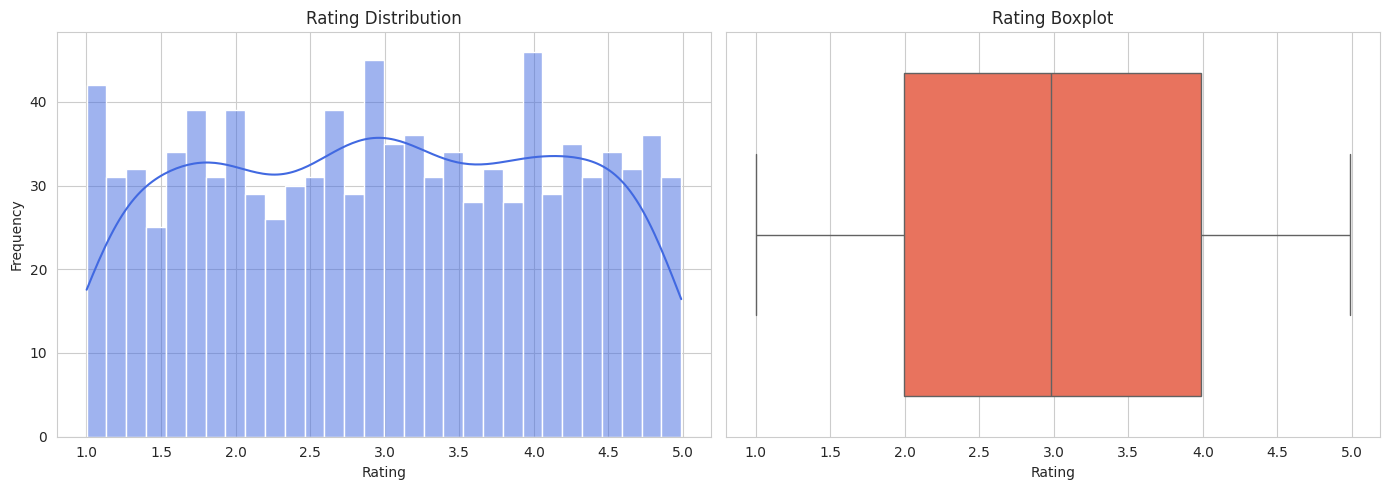

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE for Rating Distribution
sns.histplot(data=df, x="rating", bins=30, kde=True, ax=axes[0], color="royalblue", alpha=0.5)
axes[0].set_title("Rating Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency")

# Boxplot for Rating
sns.boxplot(data=df, x="rating", ax=axes[1], color="tomato")
axes[1].set_title("Rating Boxplot")
axes[1].set_xlabel("Rating")

# Show plots
plt.tight_layout()
plt.show()

## **Step 4: Most Popular Categories**

We will identify the most common product categories to understand user preferences in this dataset.

category
Kids' Fashion      351
Women's Fashion    327
Men's Fashion      322
Name: count, dtype: int64


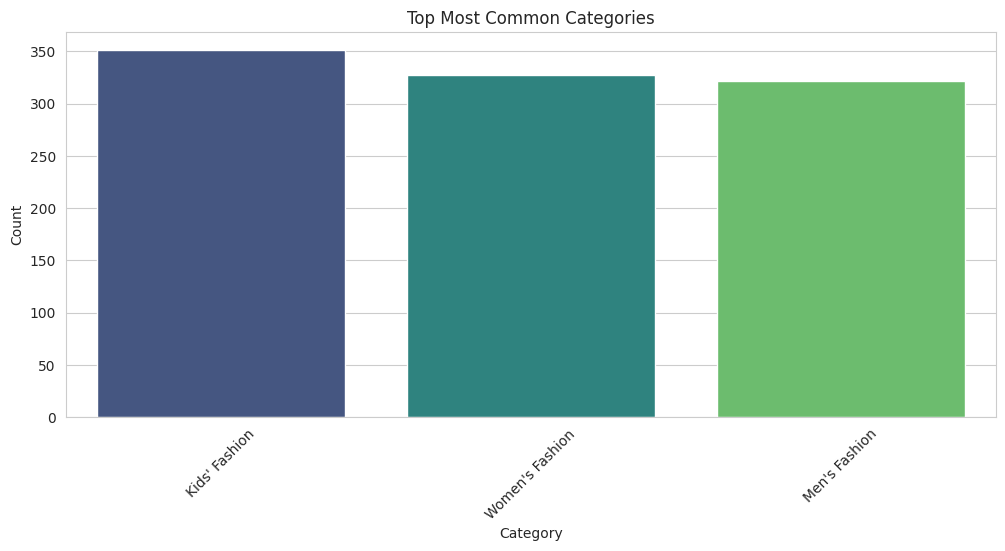

In [ ]:
# Get the top 10 most common categories
top_categories = df["category"].value_counts().head(10)


print(top_categories)
# Convert index to string (if it's numerical or float)
top_categories.index = top_categories.index.astype(str)

# Set figure size
plt.figure(figsize=(12, 5))

# Updated barplot
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette="viridis", legend=False)

# Labels & Title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top Most Common Categories")

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()


## **Step 5: Most Popular Brands**

We will analyze which brands are the most common  
to get insights into brand popularity.

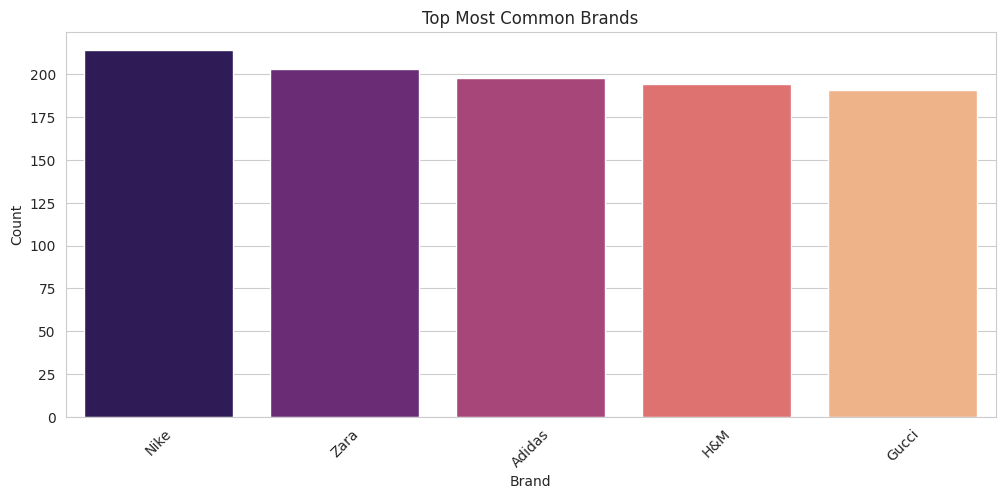

In [ ]:
# Check if brand column exists
if "brand" in df.columns:
    plt.figure(figsize=(12,5))

    # Countplot for top brands
    top_brands = df["brand"].value_counts().head(10)
    sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index, palette="magma", legend=False)
    plt.xticks(rotation=45)
    plt.title("Top Most Common Brands")
    plt.xlabel("Brand")
    plt.ylabel("Count")
    plt.show()

## **User-Product Interaction Analysis: Interactions per User**
This plot shows how many interactions each user has with different products.
A small number of users might interact a lot, while most users interact only a few times.

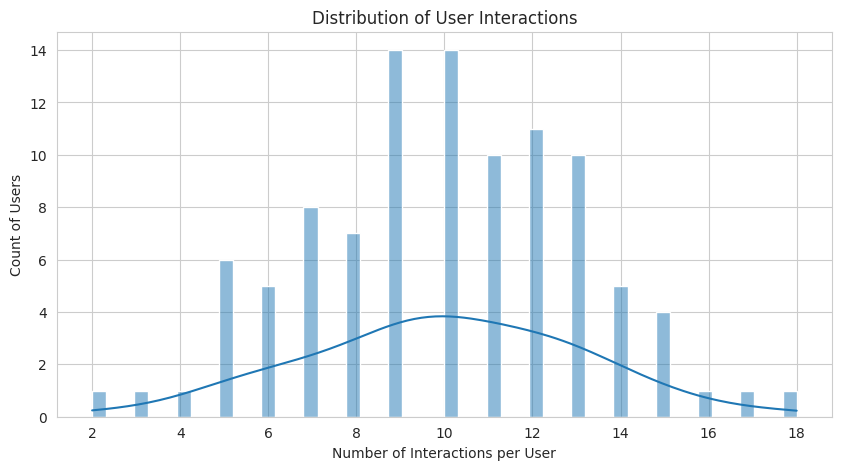

In [ ]:
user_interactions = df.groupby("user_id")["product_id"].count()

plt.figure(figsize=(10, 5))
sns.histplot(user_interactions, bins=50, kde=True)
plt.xlabel("Number of Interactions per User")
plt.ylabel("Count of Users")
plt.title("Distribution of User Interactions")
plt.show()

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['product_name', 'brand', 'category', 'color', 'size']

# Apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded dataset
print(df.head())

   user_id  product_id  product_name  brand  category  price    rating  color  \
0       19           1             0      0         1     40  1.043159      0   
1       97           2             2      2         2     82  4.026416      0   
2       25           3             0      0         2     44  3.337938      5   
3       57           4             2      4         1     23  1.049523      4   
4       79           5             4      0         1     79  4.302773      0   

   size  
0     3  
1     0  
2     3  
3     2  
4     1  


## **Scaling Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical features for scaling
numerical_features = ['price', 'rating']

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check results
print(df.head())

   user_id  product_id  product_name  brand  category     price    rating  \
0       19           1             0      0         1  0.333333  0.010582   
1       97           2             2      2         2  0.800000  0.758829   
2       25           3             0      0         2  0.377778  0.586148   
3       57           4             2      4         1  0.144444  0.012179   
4       79           5             4      0         1  0.766667  0.828144   

   color  size  
0      0     3  
1      0     0  
2      5     3  
3      4     2  
4      0     1  


## **Heatmap**

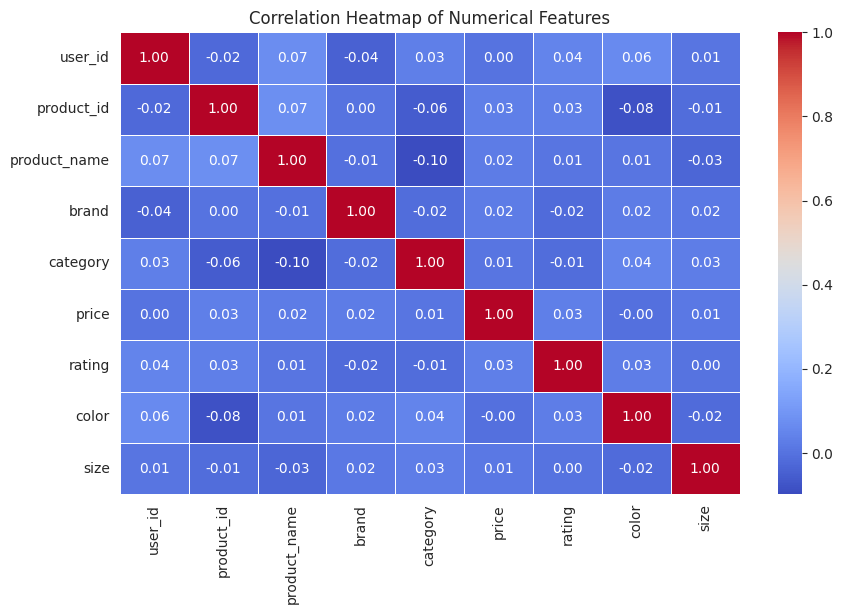

In [ ]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Finding Important Features in a Recommendation System**

## Using Feature Importance from a Machine Learning Model

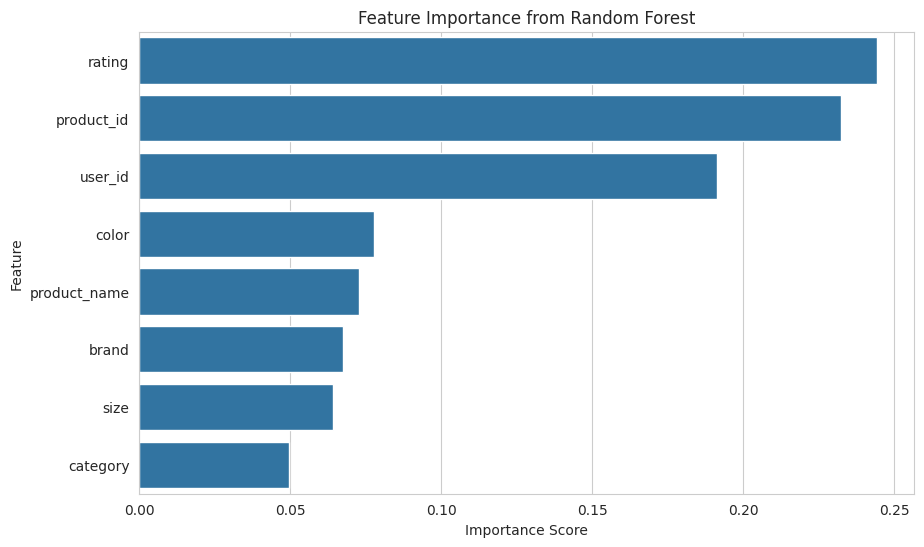

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features and target variable
X = df.drop(columns=['price'])  # Example: Predicting price
y = df['price']

# Convert categorical features into numerical format
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract feature importance
importances = model.feature_importances_

# Create a DataFrame to visualize
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## 3️⃣ Using SHAP (SHapley Additive exPlanations) for Explainability

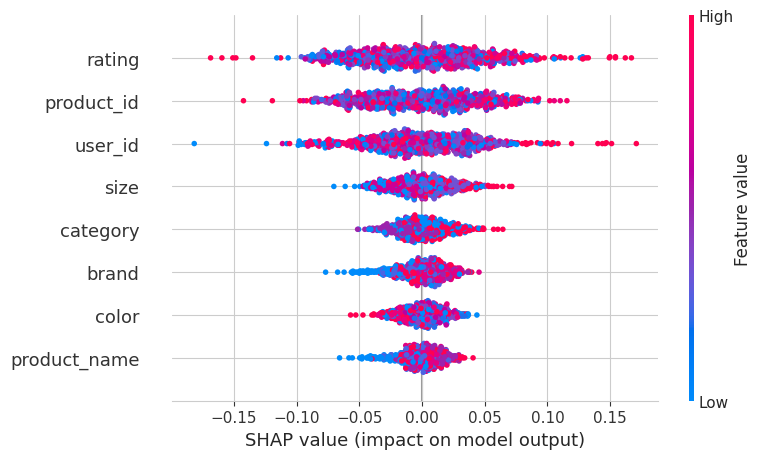

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualize feature importance
shap.summary_plot(shap_values, X_train)

# **Train a Collaborative Filtering (CF) Model using Surprise**

## **Install Surprise**

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505182 sha256=17d699101f5496247081e55b5f094448089bbe5cd7f92dd5f6133b27fa26a586
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


## **Import Required Libraries**

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import cross_validate

## **Load Data into Surprise Format**

In [ ]:
# Convert dataframe into Surprise format
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

## **Train the SVD Model**

In [ ]:
# Initialize SVD model
model = SVD()

# Perform Cross-validation to evaluate model performance
cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2985  0.3060  0.2896  0.2936  0.2856  0.2947  0.0071  
MAE (testset)     0.2613  0.2636  0.2460  0.2513  0.2445  0.2533  0.0078  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.29848036, 0.30596138, 0.28963841, 0.29364674, 0.28558157]),
 'test_mae': array([0.26125542, 0.26364251, 0.24600929, 0.25133192, 0.24449363]),
 'fit_time': (0.011284828186035156,
  0.00952291488647461,
  0.010067939758300781,
  0.009449243545532227,
  0.00937962532043457),
 'test_time': (0.0006258487701416016,
  0.00057220458984375,
  0.0005331039428710938,
  0.0005447864532470703,
  0.0005290508270263672)}

# **Hyperparameter tuning**

## **🔹 Step 1: Import Necessary Libraries**

In [ ]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

## **🔹 Step 2: Define the Hyperparameter Grid**

In [ ]:
param_grid = {
    'n_factors': [50, 100, 150],   # Latent features
    'n_epochs': [10, 20, 30],      # Training iterations
    'lr_all': [0.002, 0.005, 0.01], # Learning rate
    'reg_all': [0.02, 0.05, 0.1]    # Regularization
}

## **🔹 Step 3: Run Grid Search**

In [ ]:
# Perform Grid Search CV
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Print Best RMSE & Best Hyperparameters
print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best Parameters: {gs.best_params['rmse']}")

Best RMSE: 0.2896412801553838
Best Parameters: {'n_factors': 50, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.1}


## **🔹 Step 4: Train the Model with the Best Parameters**

In [ ]:
# Train the model using the best parameters
best_svd = SVD(n_factors=gs.best_params['rmse']['n_factors'],
               n_epochs=gs.best_params['rmse']['n_epochs'],
               lr_all=gs.best_params['rmse']['lr_all'],
               reg_all=gs.best_params['rmse']['reg_all'])

cross_validate(best_svd, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2931  0.2980  0.2971  0.2696  0.2924  0.2901  0.0105  
MAE (testset)     0.2550  0.2608  0.2541  0.2277  0.2495  0.2494  0.0114  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.29311954, 0.29804755, 0.29711873, 0.26957827, 0.2923943 ]),
 'test_mae': array([0.25495564, 0.26084446, 0.25410359, 0.22770301, 0.24950232]),
 'fit_time': (0.003916501998901367,
  0.0036554336547851562,
  0.003996610641479492,
  0.00412750244140625,
  0.003461599349975586),
 'test_time': (0.0007677078247070312,
  0.0005352497100830078,
  0.0006003379821777344,
  0.0005228519439697266,
  0.0005550384521484375)}

## **Step 5: Making Predictions for a Specific User**

In [ ]:
# Predict the rating a user would give to a specific item
user_id = "23"  # Replace with a valid user ID from your dataset
product_id = "813"  # Replace with a valid product ID

pred = best_svd.predict(user_id, product_id)
print(f"Predicted rating for User {user_id} and Product {product_id}: {pred.est}")

Predicted rating for User 23 and Product 813: 0.49878452669199724


## **Step 6: Generating Top-N Recommendations for a User**

In [ ]:
import numpy as np

def get_top_n_recommendations(svd_model, user_id, dataset, n=5):
    # Get all unique item IDs from the dataset
    all_item_ids = dataset['product_id'].unique()

    # Get items already rated by the user
    rated_items = dataset[dataset['user_id'] == user_id]['product_id'].values

    # Filter out items already rated
    unrated_items = [item for item in all_item_ids if item not in rated_items]

    # Predict ratings for all unrated items
    predictions = [svd_model.predict(user_id, item).est for item in unrated_items]

    # Sort items by predicted rating (descending order)
    top_n_items = np.argsort(predictions)[-n:][::-1]

    # Return top N recommended items
    return [unrated_items[i] for i in top_n_items]

# Example usage:
user_id = "23"  # Replace with an actual user ID from your dataset
top_recommendations = get_top_n_recommendations(best_svd, user_id, df, n=5)

print(f"Top 5 recommendations for User {user_id}: {top_recommendations}")


Top 5 recommendations for User 23: [692, 321, 346, 291, 972]


# **Model Evaluation**

## **🔹 Step 1: Evaluate Model Performance**

In [ ]:
from surprise.model_selection import train_test_split
from surprise import accuracy

# Split data into train (80%) and test (20%)
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model again (if not trained on trainset)
model.fit(trainset)

# Make predictions on test set
predictions = model.test(testset)

# Compute RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.2893
MAE:  0.2451
RMSE: 0.2892782996694136
MAE: 0.24514562845736854
